In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json, os, sys

from datetime import datetime, timedelta, timezone

from polygon import RESTClient

In [2]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from polygon_api import PolygonAPI

In [3]:
client = RESTClient(api_key='rxdopHP51cQc3RtUbZrNj7Gy0CkpR2Qn')

In [4]:
from datetime import datetime, timedelta

# Function to calculate the last working day
def last_working_day():
    today = datetime.now()
    if today.weekday() == 0:
        # If today is Monday, subtract three days to get Friday
        last_working_day = today - timedelta(days=3)
    elif today.weekday() <= 4:
        last_working_day = today - timedelta(days=1)
    # If today is Saturday, subtract one day to get Friday
    elif today.weekday() == 5:
        last_working_day = today - timedelta(days=1)
    elif today.weekday() == 6:
        last_working_day = today - timedelta(days=2)
    
    return last_working_day.strftime('%Y-%m-%d')

In [5]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'IBM', 'AMZN', 'NVDA',
          'XOM', 'CVX', 'WMT', 'MMM', 'ARE', 'ALLE', 'JPM',
          'V', 'MA', 'PEP', 'CSCO', 'BA', 'ADBE', 'CAT', 
          'BLK', 'INTC', 'NKE', 'MDLZ']

In [ ]:
client = PolygonAPI()

intra_day = last_working_day()


for ticker in tickers:

    sink_root_path = f'C:\\Users\\jmtorsvik\\git_repos\\project-anthill\\data\\polygon\\intraday\\{ticker.lower()}\\{ticker.lower()}_intraday_{intra_day.replace('-', '_')}.parquet'
    print(f"Fetching data for: {ticker}, on {intra_day}")
    intra_day_ticker = client.fetch_aggs_with_backoff(
        ticker=ticker, 
        from_date=intra_day, 
        to_date=intra_day, 
        limit=50000,
        sleep=True
        )
    break

In [ ]:
intra_day_ticker

In [21]:
import time, copy
from requests.exceptions import HTTPError
from collections import defaultdict

aggs = defaultdict(dict)


def fetch_aggs_with_backoff(ticker, open, close):
    retries = 0
    max_retries = 5
    backoff = 1  # start with 1 second

    while True:
        try:
            for a in client.list_aggs(
                ticker=ticker,
                multiplier=1,
                timespan="minute",
                limit=1000,
                from_=open,
                to=close):
                b = copy.deepcopy(a)
                timestamp = datetime.fromtimestamp(a.timestamp / 1000, timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
                aggs[timestamp] = a.__dict__
                time.sleep(0.25)  # small delay between pages
            break  # exit loop if successful

        except HTTPError as e:
            if e.response.status_code == 429:
                if retries < max_retries:
                    print(f"Rate limit hit. Retrying in {backoff} seconds...")
                    time.sleep(backoff)
                    retries += 1
                    backoff *= 2  # exponential backoff
                else:
                    print("Max retries exceeded.")
                    break
            else:
                raise  # re-raise other HTTP errors
    return aggs, a

aapl, b = fetch_aggs_with_backoff(tickers[0], open=last_close, close=last_close)

KeyboardInterrupt: 

In [8]:
print(b)

Agg(open=195.95, high=195.95, low=195.8187, close=195.85, volume=3684, vwap=195.8837, timestamp=1748044740000, transactions=93, otc=None)


In [20]:
unix_time = b.timestamp
print(unix_time)
print(type(unix_time))

timestamp = datetime.fromtimestamp(unix_time / 1000, timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
print(timestamp)
print(type(timestamp))

1748044740000
<class 'int'>
2025-05-23 23:59:00
<class 'str'>


2025-05-23 23:59:00+00:00


datetime.datetime

In [14]:
trades = client.list_trades(ticker='AAPL', timestamp=today)
for trade in trades:
    print(trade)

BadResponse: {"status":"NOT_AUTHORIZED","request_id":"553d74355021657b7a9af4e9a654a7df","message":"You are not entitled to this data. Please upgrade your plan at https://polygon.io/pricing"}

In [3]:
data['Time Series (5min)']

{'2025-05-22 19:55:00': {'1. open': '258.4000',
  '2. high': '258.4000',
  '3. low': '258.4000',
  '4. close': '258.4000',
  '5. volume': '2'},
 '2025-05-22 19:50:00': {'1. open': '258.0600',
  '2. high': '258.4200',
  '3. low': '258.0600',
  '4. close': '258.4200',
  '5. volume': '129'},
 '2025-05-22 19:45:00': {'1. open': '260.8000',
  '2. high': '260.8000',
  '3. low': '260.8000',
  '4. close': '260.8000',
  '5. volume': '1'},
 '2025-05-22 19:40:00': {'1. open': '258.2500',
  '2. high': '258.2500',
  '3. low': '258.0600',
  '4. close': '258.0600',
  '5. volume': '20'},
 '2025-05-22 19:35:00': {'1. open': '259.2600',
  '2. high': '259.2600',
  '3. low': '258.0600',
  '4. close': '258.0600',
  '5. volume': '7'},
 '2025-05-22 19:25:00': {'1. open': '258.3600',
  '2. high': '260.8000',
  '3. low': '258.3600',
  '4. close': '260.8000',
  '5. volume': '2'},
 '2025-05-22 19:20:00': {'1. open': '258.3600',
  '2. high': '258.3600',
  '3. low': '258.3600',
  '4. close': '258.3600',
  '5. volu

In [4]:
data['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2025-05-22 19:55:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [5]:
ibm = pd.DataFrame(data['Time Series (5min)']).T

In [ ]:
ingest_date = pd.to_datetime(data['Meta Data']['3. Last Refreshed']).strftime('%Y_%m_%d')

'2025_05_22'

In [7]:
ibm.head()

,1. open,2. high,3. low,4. close,5. volume
2025-05-22 19:55:00,258.4000,258.4000,258.4000,258.4000,2
2025-05-22 19:50:00,258.0600,258.4200,258.0600,258.4200,129
2025-05-22 19:45:00,260.8000,260.8000,260.8000,260.8000,1
2025-05-22 19:40:00,258.2500,258.2500,258.0600,258.0600,20
2025-05-22 19:35:00,259.2600,259.2600,258.0600,258.0600,7


In [8]:
ibm = ibm.astype(float)
ibm = ibm.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
ibm['volume'] = ibm['volume'].astype(int)

ibm.head()

,open,high,low,close,volume
2025-05-22 19:55:00,258.40,258.40,258.40,258.40,2
2025-05-22 19:50:00,258.06,258.42,258.06,258.42,129
2025-05-22 19:45:00,260.80,260.80,260.80,260.80,1
2025-05-22 19:40:00,258.25,258.25,258.06,258.06,20
2025-05-22 19:35:00,259.26,259.26,258.06,258.06,7


In [ ]:
ibm['simple_return'] = (ibm['close'] / ibm['close'].shift(-1)) - 1
ibm['log_return'] = np.log(ibm['close'] / ibm['close'].shift(-1))

ibm.head()

,open,high,low,close,volume,simple_return,log_return
2025-05-22 19:55:00,258.40,258.40,258.40,258.40,2,-0.000077,-0.000077
2025-05-22 19:50:00,258.06,258.42,258.06,258.42,129,-0.009126,-0.009168
2025-05-22 19:45:00,260.80,260.80,260.80,260.80,1,0.010618,0.010562
2025-05-22 19:40:00,258.25,258.25,258.06,258.06,20,0.000000,0.000000
2025-05-22 19:35:00,259.26,259.26,258.06,258.06,7,-0.010506,-0.010562


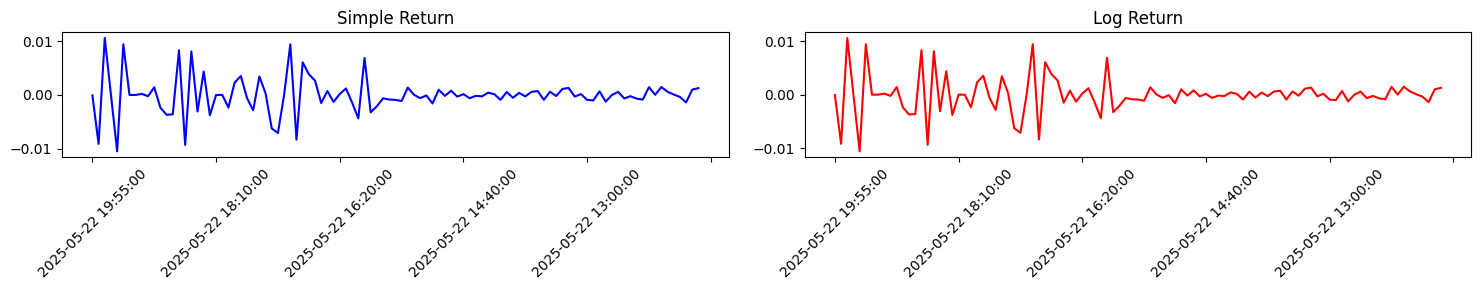

Simple Return: -0.00557 %
Log Return: -0.00616 %


In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
ibm['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
ibm['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(ibm['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(ibm['log_return'].mean() * 100, 5)} %")